## This is the Jupyter notebook with python code to load in the preprocessed response time data, to create the figures in the manuscript, and to create a .csv file for further statistical analysis in MATLAB. 

#BSD-3 License

### import necessary packages

In [1]:
import numpy as np
import scipy
from scipy.io import loadmat
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

sns.set_context("poster") # this makes things large 

%matplotlib inline

In [2]:
### decide whether or not to save figures and data for MATLAB

saveFig = False
saveMat = False

In [3]:
### import the .mat data files


#mat1 = loadmat('3ada8b_compareResponse_block_tactorSub1',squeeze_me=1)
#mat2 = loadmat('3ada8b_compareResponse_block_tactorSub2',squeeze_me=1)


mat1 = loadmat('3ada8b_compareResponse_block_1_changePts_noDelay',squeeze_me=1)
mat2 = loadmat('3ada8b_compareResponse_block_2_changePts_noDelay',squeeze_me=1)

In [4]:
### extract variables of interest
### respLo = the minimum response time
### respHi = the maximum response time

respLo = 150 # minimum response time - 150 ms
respHi = 1000 # maximum response time - 1000 ms

button1 = mat1['buttonLocs']
button2 = mat2['buttonLocs']


In [5]:
### prepare for pandas data frame


a = np.arange(0,button1.shape[0])
ndata1 = {n: 1e3*button1[n] for n in a}
a = np.arange(0,button2.shape[0])
ndata2 = {n: 1e3*button2[n] for n in a}


In [6]:
### make pandas dataframes


dataFdict1 = pd.DataFrame.from_dict(ndata1,orient='columns')
#dataFdict2 = pd.DataFrame.from_dict(ndata2,orient='columns')
dataFdict2 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in ndata2.items() ]))

In [36]:
### assign columns for dataframes


dataFdict1.columns = ['Haptic','Null','Off-Target','1.25 mA','0.8 mA','3 mA','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3, 38 @ 0.8 mA']
dataFdict2.columns = ['Null','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3 mA']


dataMelt1 = pd.melt(dataFdict1)
#dataMelt1['Subject'] = 'a1355e'
dataMelt1['Subject'] = '1'
dataMelt1['block'] = '1'
               
dataMelt2 = pd.melt(dataFdict2)
#dataMelt2['Subject'] = 'a1355e'
dataMelt2['Subject'] = '1'
dataMelt2['block'] = '2'
dataMelt1.rename(columns = {'variable':'Experiment','value':'Response Time (ms)'}, inplace = True)
dataMelt2.rename(columns = {'variable':'Experiment','value':'Response Time (ms)'}, inplace = True)


In [37]:
### concatenate

frames = [dataMelt1,dataMelt2]

result = pd.concat(frames)
result
resultTrim = result[(result['Response Time (ms)'] < respHi) & (result['Response Time (ms)'] > respLo)]
resultTrim.groupby(['Experiment','Subject','block']).mean()

experimentsOfInt =  ['Haptic','1.25 mA','0.8 mA','3 mA','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3, 38 @ 0.8 mA','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3 mA']

In [38]:
### look at various metrics of interest


dataCleaned = resultTrim[resultTrim['Experiment'].isin(experimentsOfInt)]
dataCleaned.groupby(['Experiment','Subject','block']).mean()
dataCleaned.groupby(['Experiment','Subject','block']).describe()
dataCleaned.groupby(['Subject','Experiment']).describe().round()

#dataCleaned.groupby(['Subject','experiment']).mean()
#dataCleaned.groupby(['Subject','experiment']).std()

# get counts of each type
#dataCleaned.groupby(['Subject','experiment']).count()

Response Time (ms)                              \
                                            count   mean    std    min    25%   
Subject Experiment                                                              
1       1.25 mA                              13.0  351.0   73.0  254.0  310.0   
        2 @ 3 mA                             17.0  411.0   67.0  256.0  396.0   
        2 @ 3 mA, 38 @ 1.25 mA               34.0  323.0  133.0  219.0  249.0   
        2 @ 3, 38 @ 0.8 mA                    7.0  468.0  114.0  331.0  398.0   
        3 mA                                 20.0  271.0   99.0  164.0  240.0   
        Haptic                               12.0  190.0   40.0  153.0  164.0   

                                                     
                                  50%    75%    max  
Subject Experiment                                   
1       1.25 mA                 322.0  383.0  519.0  
        2 @ 3 mA                410.0  442.0  523.0  
        2 @ 3 mA, 38 @ 1.25 mA  268.0  347.0  796.0  
        2 @ 3, 38 @ 0.8 mA      422.0  541.0  645.0  
        3 mA                    251.0  262.0  629.0  
        Haptic                  173.0  208.0  268.0

In [39]:
typeOrderSort= ['1.25 mA','0.8 mA','3 mA','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3, 38 @ 0.800 mA','2 @ 3 mA, 38 @ 1.25 mA','2 @ 3 mA']
dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.Experiment.isin(typeOrderSort))


dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(dataCleaned.Experiment.isin(typeOrderSort),other='1')
dataCleaned['typeOrder'] = dataCleaned['typeOrder'].where(~dataCleaned.Experiment.isin(typeOrderSort),other='0') 

dataCleaned=dataCleaned.assign(typeOrder=dataCleaned.Experiment.isin(typeOrderSort))


In [40]:
dataCleaned[dataCleaned['Experiment'] == '2 @ 3 mA, 38 @ 1.25 mA']

,Experiment,Response Time (ms),Subject,block,typeOrder
120,"2 @ 3 mA, 38 @ 1.25 mA",795.60704,1,1,True
121,"2 @ 3 mA, 38 @ 1.25 mA",731.05408,1,1,True
122,"2 @ 3 mA, 38 @ 1.25 mA",534.69184,1,1,True
123,"2 @ 3 mA, 38 @ 1.25 mA",269.76256,1,1,True
124,"2 @ 3 mA, 38 @ 1.25 mA",254.93504,1,1,True
125,"2 @ 3 mA, 38 @ 1.25 mA",242.60608,1,1,True
126,"2 @ 3 mA, 38 @ 1.25 mA",300.31872,1,1,True
127,"2 @ 3 mA, 38 @ 1.25 mA",326.08256,1,1,True
129,"2 @ 3 mA, 38 @ 1.25 mA",242.85184,1,1,True
130,"2 @ 3 mA, 38 @ 1.25 mA",353.52576,1,1,True


C:\Users\david\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the swarmplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


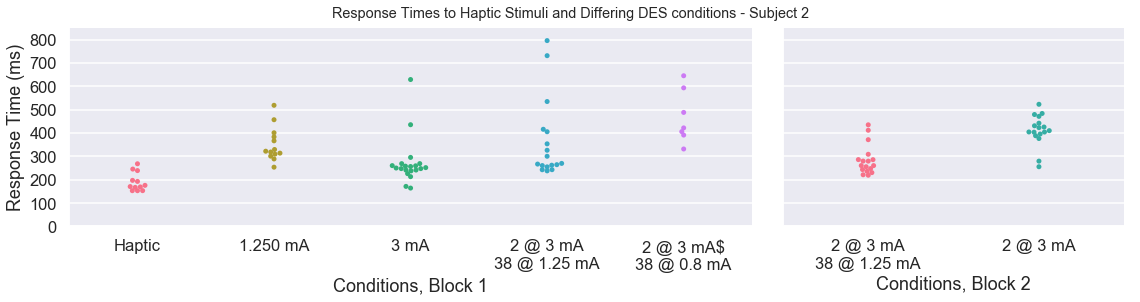

In [47]:
### use the "data cleaned" variable from above to make the individual subject plot

sns.set_context("talk")
frameIndividual = sns.FacetGrid(data=dataCleaned,col='block',height=4, aspect=2,sharex=False,sharey=True,gridspec_kws={"width_ratios": [4, 2]})
#frameIndividual.map(sns.swarmplot,'experiment','responsez time (ms)','typeOrder')
sns.set(rc={'figure.figsize':(3,4)})
plt.tight_layout()

frameIndividual.map(sns.swarmplot,'Experiment',"Response Time (ms)",palette='husl')
frameIndividual.axes[0,0].set_xlabel('Conditions, Block 1')
frameIndividual.axes[0,1].set_xlabel('Conditions, Block 2')
frameIndividual.axes[0,0].set_title('')
frameIndividual.axes[0,1].set_title('')


#dataCleaned['typeOrder']
figIndividual = plt.gcf()
plt.ylim([0,850])

#frameIndividual.axes[0,0].set_title('Different stimulation train response times ')

#plt.subplots_adjust(top=0.85)
title = frameIndividual.fig.suptitle('Response Times to Haptic Stimuli and Differing DES conditions - Subject 2') # can also get the figure from plt.gcf()
#title.set_fontsize(25)

xlab1 = ['Haptic','1.250 mA','3 mA','2 @ 3 mA','2 @ 3 mA$']
xlab2 = ['','','','38 @ 1.25 mA','38 @ 0.8 mA'] 
xlabels = ["{}\n{}".format(x1, x2) for x1, x2, in zip(xlab1,xlab2)]

frameIndividual.axes[0,0].set_xticklabels(xlabels)

xlab12 =['2 @ 3 mA','2 @ 3 mA']
xlab22 =['38 @ 1.25 mA','']
xlabels2 = ["{}\n{}".format(x1, x2) for x1, x2, in zip(xlab12,xlab22)]
frameIndividual.axes[0,1].set_xticklabels(xlabels2)

saveFig = 0
if saveFig:
    figIndividual.savefig('3ada8b_priming_RT_CP_paper.svg', dpi=600,bbox_inches='tight')
    figIndividual.savefig('3ada8b_priming_RT_CP_paper.png', dpi=600,bbox_inches='tight')
    figIndividual.savefig('3ada8b_priming_RT_CP_paper.eps', dpi=600,bbox_inches='tight')


In [28]:
from scipy.stats.mstats import kruskalwallis

priming = dataCleaned[(dataCleaned.Subject == '1') & (dataCleaned.experiment == 'priming')]['response time (ms)'].dropna()
noPriming = dataCleaned[(dataCleaned.Subject == '1') & (dataCleaned.experiment == 'no priming')]['response time (ms)'].dropna()
scipy.stats.kruskal(priming,noPriming)


AttributeError: 'DataFrame' object has no attribute 'experiment'

### check normality

In [30]:
data = dataCleaned.dropna()

groupedData = data.groupby(['Experiment'])

groupedData.apply(lambda x: scipy.stats.anderson((x['Response Time (ms)']),dist='norm'))

import statsmodels.api as sm
groupedData.apply(lambda x: sm.stats.diagnostic.normal_ad((x['Response Time (ms)'])))




Experiment
Constant Train         (0.38507980030714606, 0.36095825095384915)
High Initial Pulses      (0.6870515792738026, 0.0620842337707819)
dtype: object

In [31]:
groupedData.apply(lambda x: sm.stats.diagnostic.kstest_normal(x['Response Time (ms)'], dist='norm', pvalmethod='approx'))


Experiment
Constant Train                          (0.1268587802000184, 0.2)
High Initial Pulses    (0.21500911156846692, 0.01230882130441606)
dtype: object

In [32]:
scipy.stats.levene(data['Response Time (ms)'][data.Experiment=='High Initial Pulses'],data['Response Time (ms)'][data.Experiment=='Constant Train'])

LeveneResult(statistic=1.0999067944143952, pvalue=0.3005822378134691)